<a href="https://colab.research.google.com/github/izharullah55-debug/Health_Insurance_CrossSell_ML/blob/main/ML_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project: Health Insurance Cross-Sell Prediction**
Tools: Python, Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn

**Description**

Built a Logistic Regression model to predict customer interest in vehicle insurance using real-world insurance data. Performed data preprocessing, categorical encoding, feature scaling, and model evaluation using accuracy, confusion matrix, and classification report. Extracted feature importance to derive business insights.

In [35]:
import numpy as np
import pandas as pd

# Visualization in graphs
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries for Logistic regression
# train_test_split = split data
# StandardScaler = feature scaling
# LogisticRegression = ML model
# metrics = evaluate performance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


**CSV file uploaded and retriving for df**

In [36]:
data_frame = pd.read_csv(r'/content/train.csv')
data_frame.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


**data checking Null values and information**

In [37]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [38]:
data_frame.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


Data has no null values that is good for analysis further

**Encode Categorical Variables**

In [39]:
data_frame_encoded =  pd.get_dummies(data_frame, columns=['Gender', 'Vehicle_Age', 'Vehicle_Damage'], drop_first=True)
# Avoids multicollinearity (dummy variable trap)
data_frame_encoded.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,44,1,28.0,0,40454.0,26.0,217,1,True,False,True,True
1,2,76,1,3.0,0,33536.0,26.0,183,0,True,False,False,False
2,3,47,1,28.0,0,38294.0,26.0,27,1,True,False,True,True
3,4,21,1,11.0,1,28619.0,152.0,203,0,True,True,False,False
4,5,29,1,41.0,1,27496.0,152.0,39,0,False,True,False,False


**Define Features for (X) and Target (y)**

In [40]:
# Target Column = Response
X= data_frame_encoded.drop('Response', axis=1)
Y= data_frame_encoded['Response']
print(X.shape)
print(Y.shape)

(381109, 12)
(381109,)


**Train–Test Split**

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
# stratify=y
# Keeps class imbalance consistent in train & test sets.

**Feature Scaling.. LogisticRegression perform well when features are scaled**

In [42]:
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Train Logistic Regression Model**

In [43]:
model =  LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, Y_train)

LogisticRegression(max_iter=1000)

**Making Prediction**

In [44]:
Y_pred= model.predict(X_test_scaled)


**Model Evaluation**

In [45]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8774369604576107


**Matrix Confusion**

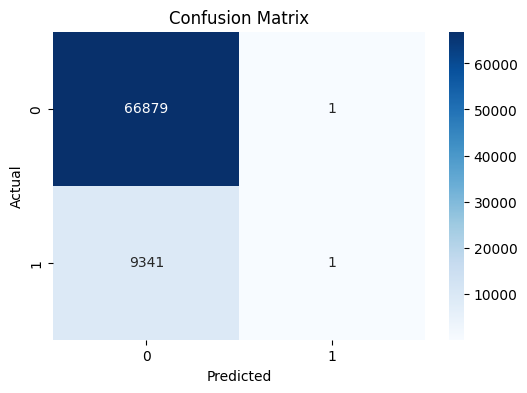

In [46]:
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Classification Report**

In [47]:
CR = classification_report(Y_test, Y_pred)
print(CR)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66880
           1       0.50      0.00      0.00      9342

    accuracy                           0.88     76222
   macro avg       0.69      0.50      0.47     76222
weighted avg       0.83      0.88      0.82     76222



**Features Importance**

In [48]:
feature_importance = pd.DataFrame({"Feature": X.columns,
    "Coefficient": model.coef_[0]}).sort_values(by='Coefficient', ascending=False)
feature_importance.head(10)

,Feature,Coefficient
11,Vehicle_Damage_Yes,1.001285
2,Driving_License,0.054464
5,Annual_Premium,0.044697
10,Vehicle_Age_> 2 Years,0.041530
8,Gender_Male,0.040553
7,Vintage,-0.000940
0,id,-0.001302
3,Region_Code,-0.004508
6,Policy_Sales_Channel,-0.130888
1,Age,-0.390342
